Your goal in this Internship (of data analysis) is to transform the raw data into information and
then convert it into knowledge.
In this Internship assignment, you would be responsible for perform data cleaning, perform
analysis for testing the (given) Hypothesis and finally put-forth your conclusion by writing a
blog article. Your blog should be as descriptive as possible with relevant visualizations to prove
your point.
The Null Hypothesis H0 is "Has the Apparent temperature and humidity compared monthly
across 10 years of the data indicate an increase due to Global warming"
The H0means we need to find whether the average Apparent temperature for the
month of a month say April starting from 2006 to 2016 and the average humidity for
the same period have increased or not. This monthly analysis has to be done for all 12
months over the 10 year period. So you are basically resampling your data from hourly
to monthly, then comparing the same month over the 10 year period. Support your
analysis by appropriate visualizations using matplotlib and / or seaborn library.

# Importing all the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/amit amar/Desktop/Data Science/Projects/New folder//weatherHistory.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
Formatted Date              96453 non-null object
Summary                     96453 non-null object
Precip Type                 95936 non-null object
Temperature (C)             96453 non-null float64
Apparent Temperature (C)    96453 non-null float64
Humidity                    96453 non-null float64
Wind Speed (km/h)           96453 non-null float64
Wind Bearing (degrees)      96453 non-null int64
Visibility (km)             96453 non-null float64
Pressure (millibars)        96453 non-null float64
Daily Summary               96453 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ MB


In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.


In [5]:
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

## Data Cleaning

We are only analyzing data based on the Formatted date, Apparent Temperature, and Humidity so we are going to drop all other remaining columns.

In [6]:
req_df=df[['Formatted Date','Apparent Temperature (C)','Humidity']]
req_df.head()

,Formatted Date,Apparent Temperature (C),Humidity
0,2006-04-01 00:00:00.000 +0200,7.388889,0.89
1,2006-04-01 01:00:00.000 +0200,7.227778,0.86
2,2006-04-01 02:00:00.000 +0200,9.377778,0.89
3,2006-04-01 03:00:00.000 +0200,5.944444,0.83
4,2006-04-01 04:00:00.000 +0200,6.977778,0.83


Create a function which extracts Year and Month from Formatted Date column. By this it will be eay to analyze and visuallize data on month and yearly basis.

In [7]:
def year(fdate):
    x=str(fdate).split(':')[0][:-3].split('-')
    return int(x[0])
def month(fdate):
    x=str(fdate).split(':')[0][:-3].split('-')
    return int(x[1])
def day(fdate):
    x=str(fdate).split(':')[0][:-3].split('-')
    return int(x[2])

In [8]:
req_df['Year']=req_df['Formatted Date'].apply(year)
req_df['Month']=req_df['Formatted Date'].apply(month)
req_df['Day']=req_df['Formatted Date'].apply(day)
req_df.drop('Formatted Date',axis=1,inplace=True)
req_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,Apparent Temperature (C),Humidity,Year,Month,Day
0,7.388889,0.89,2006,4,1
1,7.227778,0.86,2006,4,1
2,9.377778,0.89,2006,4,1
3,5.944444,0.83,2006,4,1
4,6.977778,0.83,2006,4,1


Create different dataframe for diifferent years so that it will be easy comparing between years and months.

In [9]:
df_2016=req_df[req_df['Year']==2016]
df_2012=req_df[req_df['Year']==2012]
df_2010=req_df[req_df['Year']==2010]
df_2008=req_df[req_df['Year']==2008]
df_2015=req_df[req_df['Year']==2015]
df_2013=req_df[req_df['Year']==2013]
df_2011=req_df[req_df['Year']==2011]
df_2009=req_df[req_df['Year']==2009]
df_2007=req_df[req_df['Year']==2007]
df_2006=req_df[req_df['Year']==2006]
df_2014=req_df[req_df['Year']==2014]

Extract Maximum, Minimim and Average temperature and humidity values for each years and plot them using seabron line plot.

In [10]:
df_list=[df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016]
max_temp=[]
min_temp=[]
avg_temp=[]
max_humidity=[]
min_humidity=[]
avg_humidity=[]
for i in df_list:
    max_temp.append(i['Apparent Temperature (C)'].max())
    min_temp.append(i['Apparent Temperature (C)'].min())
    avg_temp.append(i['Apparent Temperature (C)'].mean())
    max_humidity.append(i['Humidity'].max())
    min_humidity.append(i['Humidity'].min())
    avg_humidity.append(i['Humidity'].mean())

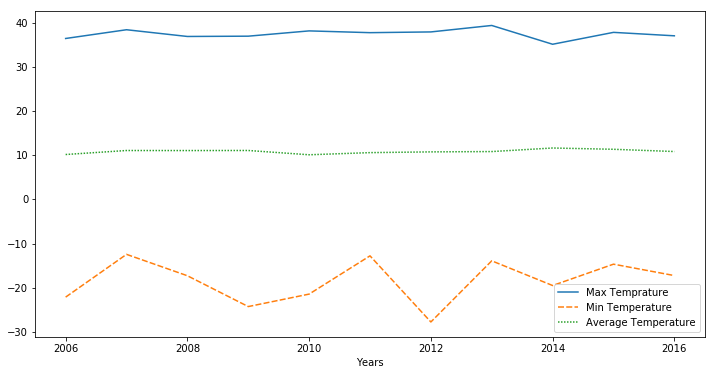

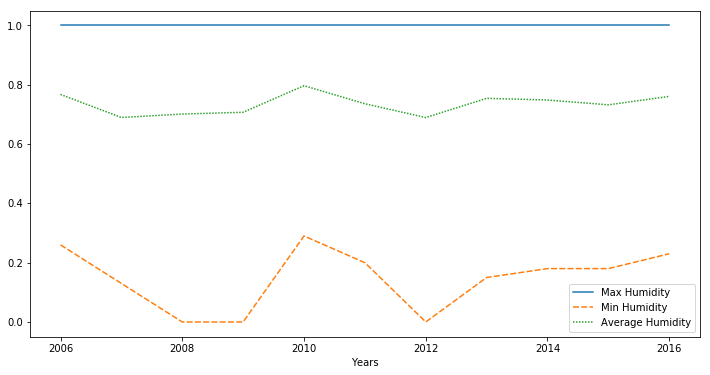

In [11]:
df_list=[df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016]
max_temp=[]
min_temp=[]
avg_temp=[]
max_humidity=[]
min_humidity=[]
avg_humidity=[]
for i in df_list:
    max_temp.append(i['Apparent Temperature (C)'].max())
    min_temp.append(i['Apparent Temperature (C)'].min())
    avg_temp.append(i['Apparent Temperature (C)'].mean())
    max_humidity.append(i['Humidity'].max())
    min_humidity.append(i['Humidity'].min())
    avg_humidity.append(i['Humidity'].mean())
year_list=[2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]
plt.figure(figsize=(12,6))
sns.lineplot(data=pd.DataFrame({'Years':year_list,'Max Temprature':max_temp,'Min Temperature':min_temp,'Average Temperature':avg_temp}).set_index('Years'))
plt.figure(figsize=(12,6))
sns.lineplot(data=pd.DataFrame({'Years':year_list,'Max Humidity':max_humidity,'Min Humidity':min_humidity,'Average Humidity':avg_humidity}).set_index('Years'))

The 1st figure below shows the maximum, minimum, and average temperature for each year from 2006 to 2016. It shows that there is a big drop in minimum temperature in the year 2012. The 2nd figure shows the variation in maximum, minimum, and average humidity across the years. The year 2010 sees an increase in average humidity and minimum humidity over the year and while years 2008,2009 and 2010 have seen some dry days with 0 humidity.

Write a function that calculates Maximum, Minimim and Average temperature and humidity values for a given value of month.

In [12]:
def stat(month):
    df_list=[df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016]
    max_temp=[]
    min_temp=[]
    avg_temp=[]
    max_humidity=[]
    min_humidity=[]
    avg_humidity=[]
    for i in df_list:
        max_temp.append(i[i['Month']==month]['Apparent Temperature (C)'].max())
        min_temp.append(i[i['Month']==month]['Apparent Temperature (C)'].min())
        avg_temp.append(i[i['Month']==month]['Apparent Temperature (C)'].mean())
        max_humidity.append(i[i['Month']==month]['Humidity'].max())
        min_humidity.append(i[i['Month']==month]['Humidity'].min())
        avg_humidity.append(i[i['Month']==month]['Humidity'].mean())
    return list((max_temp,min_temp,avg_temp,max_humidity,min_humidity,avg_humidity))

Now let's see have a look at the monthly comparison of apparent temperature over the years.

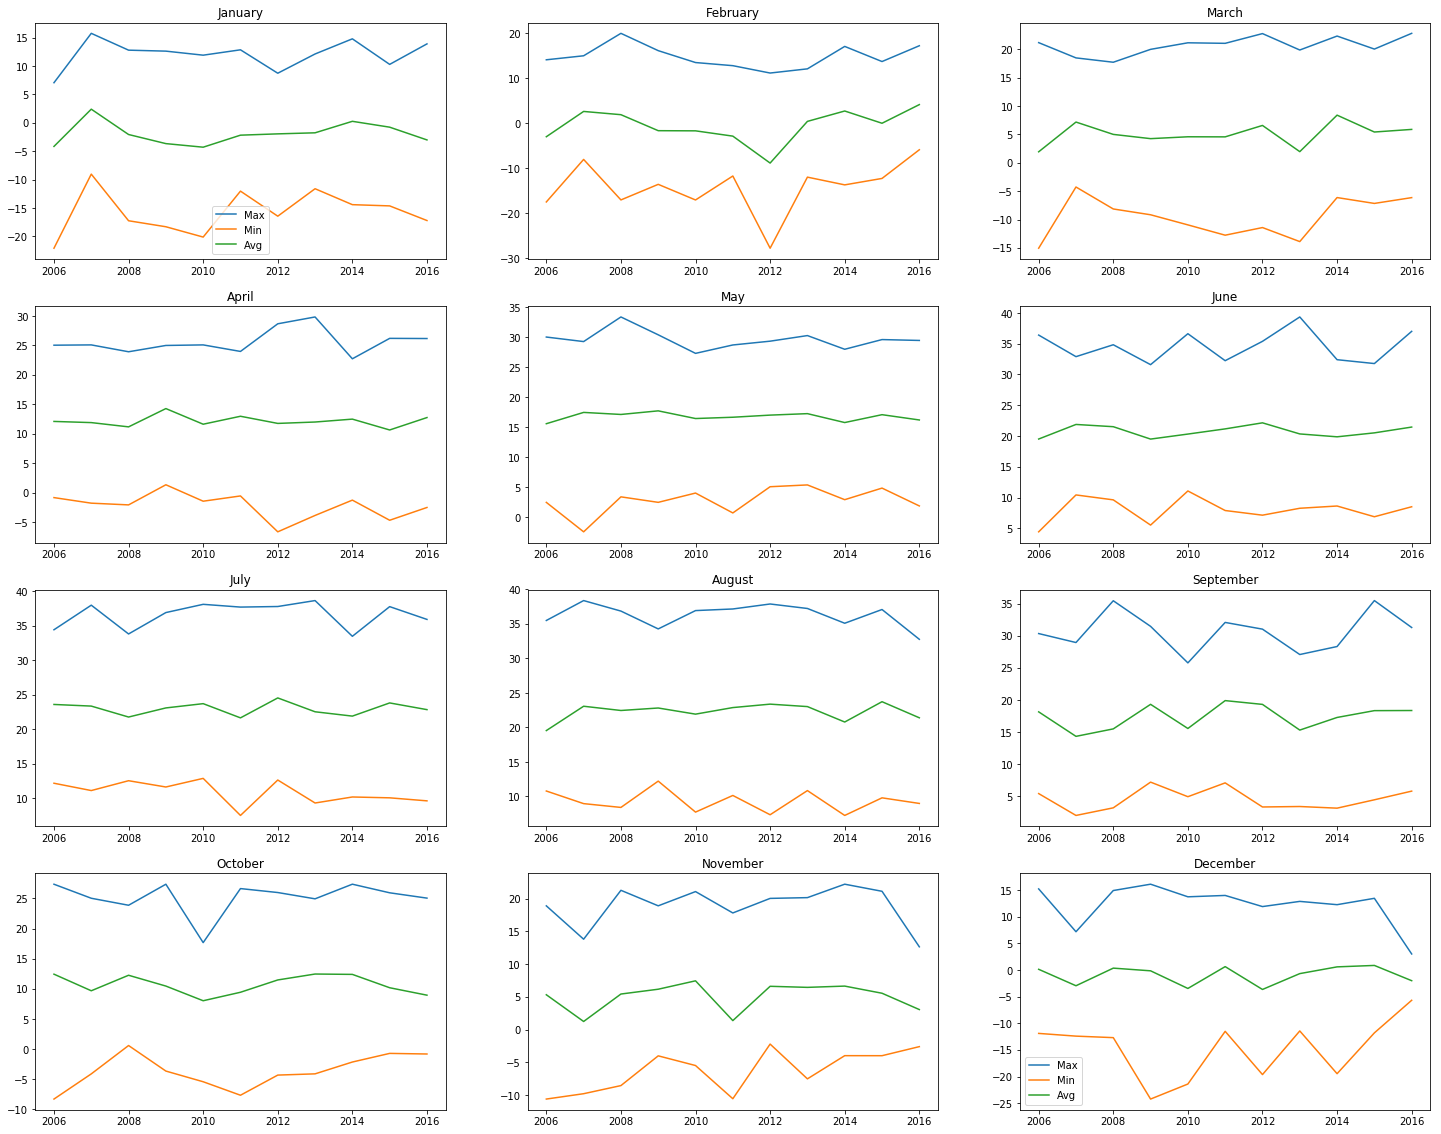

In [13]:
fig,a =  plt.subplots(4,3,figsize=(25,20))
a[0][0].set_title('January')
a[0][0].plot(year_list,stat(1)[0],label='Max')
a[0][0].plot(year_list,stat(1)[1],label='Min')
a[0][0].plot(year_list,stat(1)[2],label='Avg')
a[0][0].legend()
a[0][1].set_title('February')
a[0][1].plot(year_list,stat(2)[0],label='Max')
a[0][1].plot(year_list,stat(2)[1],label='Min')
a[0][1].plot(year_list,stat(2)[2],label='Avg')
a[0][2].set_title('March')
a[0][2].plot(year_list,stat(3)[0],label='Max')
a[0][2].plot(year_list,stat(3)[1],label='Min')
a[0][2].plot(year_list,stat(3)[2],label='Avg')
a[1][0].set_title('April')
a[1][0].plot(year_list,stat(4)[0],label='Max')
a[1][0].plot(year_list,stat(4)[1],label='Min')
a[1][0].plot(year_list,stat(4)[2],label='Avg')
a[1][1].set_title('May')
a[1][1].plot(year_list,stat(5)[0],label='Max')
a[1][1].plot(year_list,stat(5)[1],label='Min')
a[1][1].plot(year_list,stat(5)[2],label='Avg')
a[1][2].set_title('June')
a[1][2].plot(year_list,stat(6)[0],label='Max')
a[1][2].plot(year_list,stat(6)[1],label='Min')
a[1][2].plot(year_list,stat(6)[2],label='Avg')
a[2][0].set_title('July')
a[2][0].plot(year_list,stat(7)[0],label='Max')
a[2][0].plot(year_list,stat(7)[1],label='Min')
a[2][0].plot(year_list,stat(7)[2],label='Avg')
a[2][1].set_title('August')
a[2][1].plot(year_list,stat(8)[0],label='Max')
a[2][1].plot(year_list,stat(8)[1],label='Min')
a[2][1].plot(year_list,stat(8)[2],label='Avg')
a[2][2].set_title('September')
a[2][2].plot(year_list,stat(9)[0],label='Max')
a[2][2].plot(year_list,stat(9)[1],label='Min')
a[2][2].plot(year_list,stat(9)[2],label='Avg')
a[3][0].set_title('October')
a[3][0].plot(year_list,stat(10)[0],label='Max')
a[3][0].plot(year_list,stat(10)[1],label='Min')
a[3][0].plot(year_list,stat(10)[2],label='Avg')
a[3][1].set_title('November')
a[3][1].plot(year_list,stat(11)[0],label='Max')
a[3][1].plot(year_list,stat(11)[1],label='Min')
a[3][1].plot(year_list,stat(11)[2],label='Avg')
a[3][2].set_title('December')
a[3][2].plot(year_list,stat(12)[0],label='Max')
a[3][2].plot(year_list,stat(12)[1],label='Min')
a[3][2].plot(year_list,stat(12)[2],label='Avg')
a[3][2].legend()

The figure above shows us January of 2007 was the hottest compared to all other years. It has an above-average maximum temperature and average temperature. February has seen a fall in temperature from 2009–2013 and the year 2012 has the coldest February among all. Then the same trend is followed by March in 2013 which clearly shows the shift in climate. Similarly, other months also shows the fluctuation in temperature yearly.

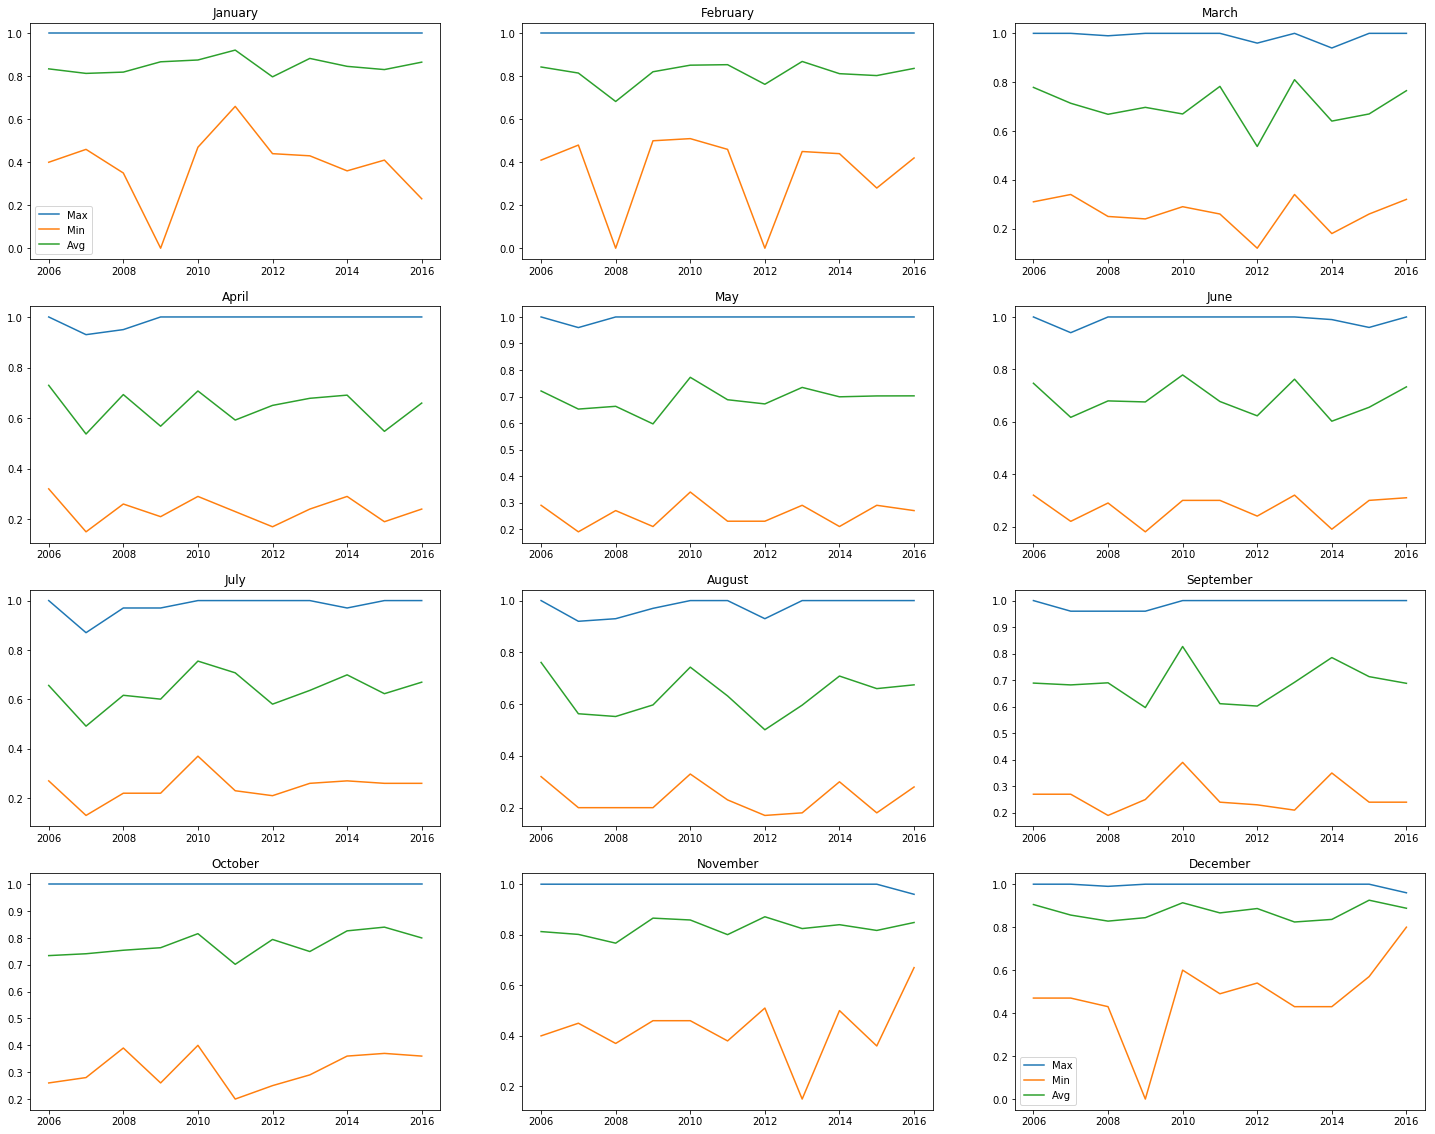

In [14]:
fig,a =  plt.subplots(4,3,figsize=(25,20))
a[0][0].set_title('January')
a[0][0].plot(year_list,stat(1)[3],label='Max')
a[0][0].plot(year_list,stat(1)[4],label='Min')
a[0][0].plot(year_list,stat(1)[5],label='Avg')
a[0][0].legend()
a[0][1].set_title('February')
a[0][1].plot(year_list,stat(2)[3],label='Max')
a[0][1].plot(year_list,stat(2)[4],label='Min')
a[0][1].plot(year_list,stat(2)[5],label='Avg')
a[0][2].set_title('March')
a[0][2].plot(year_list,stat(3)[3],label='Max')
a[0][2].plot(year_list,stat(3)[4],label='Min')
a[0][2].plot(year_list,stat(3)[5],label='Avg')
a[1][0].set_title('April')
a[1][0].plot(year_list,stat(4)[3],label='Max')
a[1][0].plot(year_list,stat(4)[4],label='Min')
a[1][0].plot(year_list,stat(4)[5],label='Avg')
a[1][1].set_title('May')
a[1][1].plot(year_list,stat(5)[3],label='Max')
a[1][1].plot(year_list,stat(5)[4],label='Min')
a[1][1].plot(year_list,stat(5)[5],label='Avg')
a[1][2].set_title('June')
a[1][2].plot(year_list,stat(6)[3],label='Max')
a[1][2].plot(year_list,stat(6)[4],label='Min')
a[1][2].plot(year_list,stat(6)[5],label='Avg')
a[2][0].set_title('July')
a[2][0].plot(year_list,stat(7)[3],label='Max')
a[2][0].plot(year_list,stat(7)[4],label='Min')
a[2][0].plot(year_list,stat(7)[5],label='Avg')
a[2][1].set_title('August')
a[2][1].plot(year_list,stat(8)[3],label='Max')
a[2][1].plot(year_list,stat(8)[4],label='Min')
a[2][1].plot(year_list,stat(8)[5],label='Avg')
a[2][2].set_title('September')
a[2][2].plot(year_list,stat(9)[3],label='Max')
a[2][2].plot(year_list,stat(9)[4],label='Min')
a[2][2].plot(year_list,stat(9)[5],label='Avg')
a[3][0].set_title('October')
a[3][0].plot(year_list,stat(10)[3],label='Max')
a[3][0].plot(year_list,stat(10)[4],label='Min')
a[3][0].plot(year_list,stat(10)[5],label='Avg')
a[3][1].set_title('November')
a[3][1].plot(year_list,stat(11)[3],label='Max')
a[3][1].plot(year_list,stat(11)[4],label='Min')
a[3][1].plot(year_list,stat(11)[5],label='Avg')
a[3][2].set_title('December')
a[3][2].plot(year_list,stat(12)[3],label='Max')
a[3][2].plot(year_list,stat(12)[4],label='Min')
a[3][2].plot(year_list,stat(12)[5],label='Avg')
a[3][2].legend()

The figure above shows a major drop-in average humidity across January, February, March, September, October, and November of 2012. There is no clear pattern among any months in these years while looking at the above figure. One month of one year the most humid month while the following year's same month was the dryest month.

From the above analysis, we can see the fluctuation in climate due to global warming.